In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = glob(f'feature_importance*.xlsx')
df = pd.concat(pd.read_excel(excel_file) for excel_file in files)
df.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)

In [3]:
df

,feature,importance,stddev,p_value,n,p99_high,p99_low
0,eval-TLP-Tavec-3_RI_AT-PD,0.125068,0.012005,0.000010,5,0.149785,0.100350
1,eval-TLP-Stroop-palabras-PD,0.035269,0.006330,0.000119,5,0.048302,0.022236
2,eval-TLP-Tavec-11_RCl_LP-PD,0.029836,0.003340,0.000019,5,0.036713,0.022959
3,eval-TLP-FigRey-totalCopia-PD,0.023845,0.002495,0.000014,5,0.028982,0.018707
4,eval-TLP-Stroop-color-PD,0.021146,0.004547,0.000242,5,0.030509,0.011783
...,...,...,...,...,...,...,...
14,eval-TLP-FigRey-totalMemoria-PD,0.002566,0.000442,0.000102,5,0.003476,0.001656
15,eval-TLP-Stroop-palabrasColor-PD,0.002337,0.000147,0.000002,5,0.002640,0.002034
16,clin-reservaCognitiva_escolaridad,0.001803,0.000228,0.000030,5,0.002272,0.001334
17,eval-TLP-FigRey-Duracion-PD,0.001448,0.000438,0.000892,5,0.002350,0.000546


Importancia por característica

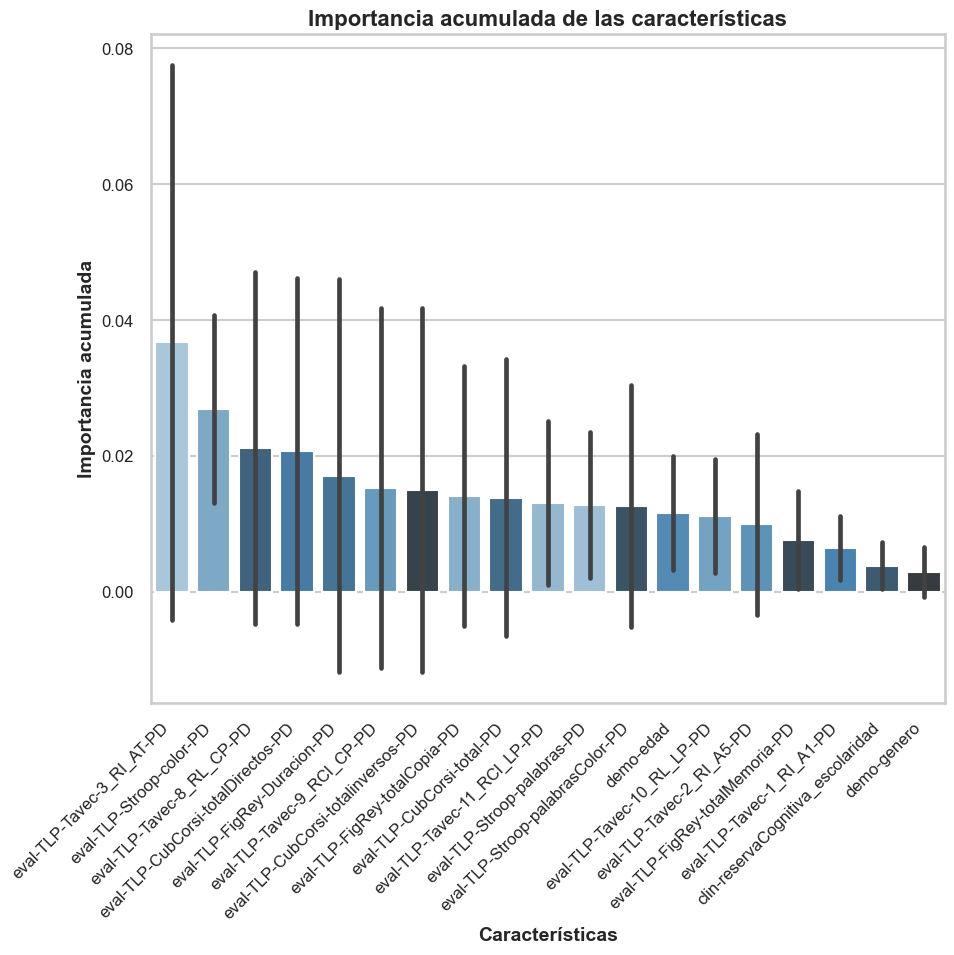

In [4]:
# Ordenar las features según la importancia (de mayor a menor)
order = df.groupby('feature', as_index=False)['importance'].sum().sort_values('importance', ascending=False)['feature']

# Estilo científico y profesional
sns.set(style="whitegrid", context="talk", font_scale=1.2)

plt.figure(figsize=(10, 10))

# Añadir hue y desactivar leyenda para evitar el warning
sns.barplot(
    data=df,
    x='feature',
    y='importance',
    hue='feature',         # Necesario para usar palette sin warning
    palette='Blues_d',
    order=order,
    legend=False,
    errorbar="sd"
)

# Etiquetas y título
plt.xlabel('Características', fontsize=14, weight='bold')
plt.ylabel('Importancia acumulada', fontsize=14, weight='bold')
plt.title('Importancia acumulada de las características', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')

# Ajustes estéticos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [5]:
feature_importance= df.groupby('feature')[['importance', 'stddev']].sum().sort_values('importance', ascending=False).reset_index()

In [6]:
feature_importance

,feature,importance,stddev
0,eval-TLP-Tavec-3_RI_AT-PD,0.367855,0.035932
1,eval-TLP-Stroop-color-PD,0.269965,0.035149
2,eval-TLP-Tavec-8_RL_CP-PD,0.212255,0.027030
3,eval-TLP-CubCorsi-totalDirectos-PD,0.207347,0.029346
4,eval-TLP-FigRey-Duracion-PD,0.171270,0.022594
5,eval-TLP-Tavec-9_RCl_CP-PD,0.153771,0.020803
6,eval-TLP-CubCorsi-totalinversos-PD,0.150308,0.020738
7,eval-TLP-FigRey-totalCopia-PD,0.140893,0.021605
8,eval-TLP-CubCorsi-total-PD,0.139287,0.023433
9,eval-TLP-Tavec-11_RCl_LP-PD,0.131269,0.022033


P-valor

In [7]:
feature_p_value = df[df['p_value'] < 0.05].groupby('feature')['feature'].count().sort_values(ascending=False).reset_index(name='count')

In [8]:
feature_p_value

,feature,count
0,clin-reservaCognitiva_escolaridad,10
1,demo-edad,10
2,eval-TLP-Tavec-8_RL_CP-PD,10
3,eval-TLP-Tavec-3_RI_AT-PD,10
4,eval-TLP-Tavec-2_RI_A5-PD,10
5,eval-TLP-Tavec-11_RCl_LP-PD,10
6,eval-TLP-Tavec-10_RL_LP-PD,10
7,eval-TLP-Stroop-palabrasColor-PD,10
8,eval-TLP-Stroop-palabras-PD,10
9,eval-TLP-Stroop-color-PD,10


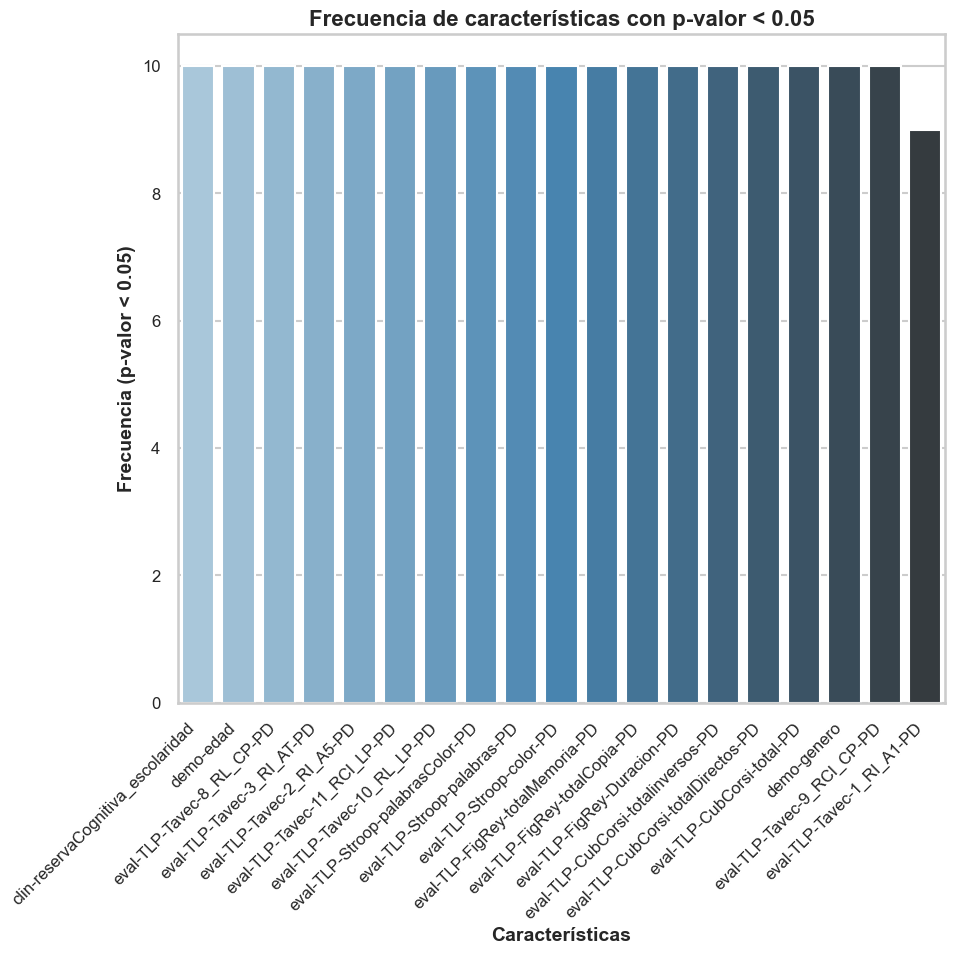

In [9]:
# Estilo científico y profesional
sns.set(style="whitegrid", context="talk", font_scale=1.2)

plt.figure(figsize=(10, 10))

# Añadir hue y desactivar leyenda para evitar el warning
sns.barplot(
    data=feature_p_value,
    x='feature',
    y='count',
    hue='feature',         # Necesario para usar palette sin warning
    palette='Blues_d',
    legend=False
)

# Etiquetas y título
plt.xlabel('Características', fontsize=14, weight='bold')
plt.ylabel('Frecuencia (p-valor < 0.05)', fontsize=14, weight='bold')
plt.title('Frecuencia de características con p-valor < 0.05', fontsize=16, weight='bold')

# Ajustes estéticos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
